# 5318 Assignment 2: Group 110 
## Chris Ovenden (Unikey: cove9096; SID: 530387022) & David Belau (Unikey: dbel0014; SID: 530251930)

## Load data & packages; data review & understanding

In [2]:
import pickle
import numpy as np

# Specify the file paths of the pkl files
train_file_path = 'emnist_train.pkl'
test_file_path = 'emnist_test.pkl'

# Load the training data from the pkl file
with open(train_file_path, 'rb') as file:
    train_data_dict = pickle.load(file)

# Extract the training data and labels from the dictionary
train_data = train_data_dict['data']
train_labels = train_data_dict['labels']

# Load the test data from the pkl file
with open(test_file_path, 'rb') as file:
    test_data_dict = pickle.load(file)

# Extract the test data and labels from the dictionary
test_data = test_data_dict['data']
test_labels = test_data_dict['labels']

# Print the shapes of the training and test data and labels
print('Training Data shape:', train_data.shape)
print('Training Labels shape:', train_labels.shape)
print('Test Data shape:', test_data.shape)
print('Test Labels shape:', test_labels.shape)


Training Data shape: (100000, 28, 28)
Training Labels shape: (100000,)
Test Data shape: (20000, 28, 28)
Test Labels shape: (20000,)


In [3]:
train_data.dtype

dtype('uint8')

In [4]:
#each pixel intensity is represented as a byte (uint8)

<function matplotlib.pyplot.show(close=None, block=None)>

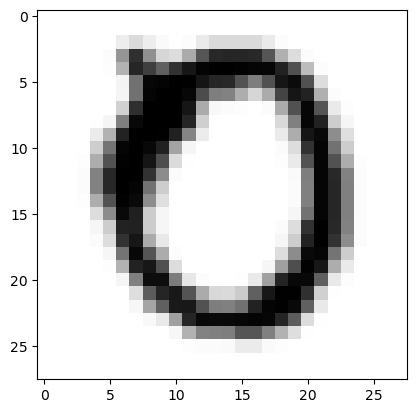

In [5]:
# Plot an image from the training dataset
import matplotlib.pyplot as plt
plt.imshow(train_data[0], cmap="binary")
plt.show

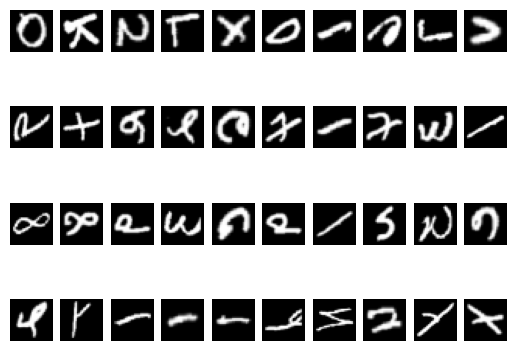

In [6]:
# Plot images sitting in the first 4 rows and first 10 columns from the training dataset
import matplotlib.pyplot as plt

# Display the first 4 rows and first 10 columns of train_data
for i in range(4):
    for j in range(10):
        image = train_data[i * 10 + j].reshape((28, 28))
        plt.subplot(4, 10, i * 10 + j + 1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')

plt.show()



In [7]:
# Check the format of the label by looking at the first 2 examples
print(train_data[0:2])

#List all unique labels in the training set
print(np.unique(train_labels))
print(np.unique(test_labels))



[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61]


## Random Forest Model

In [8]:
# RANDOM FOREST BASE MODEL
'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef

# Reshape the train_data and test_data
X_train = train_data.reshape(train_data.shape[0], -1)
X_test = test_data.reshape(test_data.shape[0], -1)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=5, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, train_labels)

# Predict labels for train_data and test_data
train_predictions = rf_classifier.predict(X_train)
test_predictions = rf_classifier.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(train_labels, train_predictions)
test_accuracy = accuracy_score(test_labels, test_predictions)

# Calculate F1 score
train_f1_score = f1_score(train_labels, train_predictions, average='macro')
test_f1_score = f1_score(test_labels, test_predictions, average='macro')

# Calculate Matthews Correlation Coefficient (MCC)
train_mcc = matthews_corrcoef(train_labels, train_predictions)
test_mcc = matthews_corrcoef(test_labels, test_predictions)

# Print the accuracy measures
print('Summary of accuracy measures:')
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Training F1 Score:", train_f1_score)
print("Test F1 Score:", test_f1_score)
print("Training MCC:", train_mcc)
print("Test MCC:", test_mcc)

'''


Summary of accuracy measures:
Training Accuracy: 0.74797
Test Accuracy: 0.71075
Training F1 Score: 0.5172902455778382
Test F1 Score: 0.4591551182321354
Training MCC: 0.7395012095343837
Test MCC: 0.7008766120632225


In [ ]:
# RF GRID SEARCH TO IDENTIFY THE BEST HYPERPARAMETERS TO TUNE
## PLEASE NOTE, THIS CODE TAKES 6 HOURS TO RUN SO I RAN IT IN GOOGLE COLAB HAVE TURNED IT ALL OFF BELOW
## THE OUTPUTS FROM GOOGLE COLAB WERE COPIED & PASTED IN THE NEXT BOX
''' 
import tensorflow as tf
tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score, matthews_corrcoef
from sklearn.model_selection import GridSearchCV

# Reshape the train_data and test_data
X_train = train_data.reshape(train_data.shape[0], -1)
X_test = test_data.reshape(test_data.shape[0], -1)

# Define the parameter grid for grid search
param_grid = {
     'n_estimators': [100, 200, 300],  # Vary the number of estimators
     'max_depth': [None, 10, 20],  # Vary the maximum depth
     'min_samples_split': [2, 5, 10],  # Vary the minimum number of samples required to split
 }

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create a scorer for F1 score and Matthews Correlation Coefficient
scoring = {
     'F1 Score': make_scorer(f1_score, average='macro'),
     'MCC': make_scorer(matthews_corrcoef)
 }

# Perform grid search
grid_search = GridSearchCV(rf_classifier, param_grid, scoring=scoring, refit='F1 Score', cv=5)
grid_search.fit(X_train, train_labels)

# Print the best parameters and results
print('Best Parameters:', grid_search.best_params_)
print('Best F1 Score:', grid_search.best_score_)
print('Best MCC:', grid_search.cv_results_['mean_test_MCC'][grid_search.best_index_])

# Get the best model
best_model = grid_search.best_estimator_

# Predict labels for train_data and test_data using the best model
train_predictions = best_model.predict(X_train)
test_predictions = best_model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(train_labels, train_predictions)
test_accuracy = accuracy_score(test_labels, test_predictions)

# Calculate F1 score
train_f1_score = f1_score(train_labels, train_predictions, average='macro')
test_f1_score = f1_score(test_labels, test_predictions, average='macro')

# Calculate Matthews Correlation Coefficient (MCC)
train_mcc = matthews_corrcoef(train_labels, train_predictions)
test_mcc = matthews_corrcoef(test_labels, test_predictions)

# Print the accuracy measures
print('Summary of accuracy measures:')
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Training F1 Score:", train_f1_score)
print("Test F1 Score:", test_f1_score)
print("Training MCC:", train_mcc)
print("Test MCC:", test_mcc)

''' 


Results of Above Code  
------------------------------
GRID SEARCH RUN IN GOOGLE COLAB DUE TO THE CONSTRAINTS OF MY PC;  
OUTPUT FROM GOOGLE COLAB:  
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}  
Best F1 Score: 0.6070474202398612  
Best MCC: 0.7860511861633357  
Summary of accuracy measures:  
Training Accuracy: 1.0  
Test Accuracy: 0.79935  
Training F1 Score: 1.0  
Test F1 Score: 0.6117029238857137  
Training MCC: 1.0  
Test MCC: 0.7924894621379123  


## Convolutional Neural Networks (CNN) using Keras

In [12]:
# CNN Base Model
'''
import pickle
import numpy as np
import tensorflow as tf
from sklearn.metrics import f1_score, matthews_corrcoef
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# Specify the file paths of the pkl files
train_file_path = 'emnist_train.pkl'
test_file_path = 'emnist_test.pkl'

# Load the training data from the pkl file
with open(train_file_path, 'rb') as file:
    train_data_dict = pickle.load(file)

# Extract the training data and labels from the dictionary
train_data = train_data_dict['data']
train_labels = train_data_dict['labels']

# Load the test data from the pkl file
with open(test_file_path, 'rb') as file:
    test_data_dict = pickle.load(file)

# Extract the test data and labels from the dictionary
test_data = test_data_dict['data']
test_labels = test_data_dict['labels']

# Reshape the data to fit the CNN input shape
train_data = np.reshape(train_data, (train_data.shape[0], 28, 28, 1))
test_data = np.reshape(test_data, (test_data.shape[0], 28, 28, 1))

# Convert the labels to one-hot encoding (preprocessing step to scale the data into binary columns with values of 0 or 1)
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=62)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=62)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(62, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, train_labels, epochs=5, batch_size=64, validation_data=(test_data, test_labels))

print('Summary of accuracy measures:')

# Evaluate the model on the training data
train_loss, train_acc = model.evaluate(train_data, train_labels)
print('Training Accuracy:', train_acc)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test Accuracy:', test_acc)

# Predict on the training data
train_predictions = model.predict(train_data)
train_predictions = np.argmax(train_predictions, axis=1)

# Predict on the test data
test_predictions = model.predict(test_data)
test_predictions = np.argmax(test_predictions, axis=1)

# **Calculate the F1 Score for training data
train_f1_score = f1_score(np.argmax(train_labels, axis=1), train_predictions, average='macro')
print('Training F1 Score:', train_f1_score)

# Calculate the F1 Score for test data
test_f1_score = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='macro')
print('Test F1 Score:', test_f1_score)

# Calculate the Matthews Correlation Coefficient for training data
train_mcc = matthews_corrcoef(np.argmax(train_labels, axis=1), train_predictions)
print('Training MCC:', train_mcc)

# Calculate the Matthews Correlation Coefficient for test data
test_mcc = matthews_corrcoef(np.argmax(test_labels, axis=1), test_predictions)
print('Test MCC:', test_mcc)

'''

Epoch 1/5
1563/1563 [==============================] - 46s 30ms/step - loss: 1.5862 - accuracy: 0.5924 - val_loss: 0.7380 - val_accuracy: 0.7583
Epoch 2/5
1563/1563 [==============================] - 48s 31ms/step - loss: 0.8270 - accuracy: 0.7425 - val_loss: 0.6242 - val_accuracy: 0.7889
Epoch 3/5
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7157 - accuracy: 0.7691 - val_loss: 0.5958 - val_accuracy: 0.7998
Epoch 4/5
1563/1563 [==============================] - 50s 32ms/step - loss: 0.6597 - accuracy: 0.7832 - val_loss: 0.5741 - val_accuracy: 0.8072
Epoch 5/5
1563/1563 [==============================] - 46s 30ms/step - loss: 0.6229 - accuracy: 0.7936 - val_loss: 0.5657 - val_accuracy: 0.8105
Summary of accuracy measures:
3125/3125 [==============================] - 15s 5ms/step - loss: 0.4807 - accuracy: 0.8270
Training Accuracy: 0.8269500136375427
625/625 [==============================] - 3s 5ms/step - loss: 0.5657 - accuracy: 0.8105
Test Accuracy: 0.810450017

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

In [22]:
# CNN GRID SEARCH TO IDENTIFY THE BEST HYPERPARAMETERS TO TUNE
##  PLEASE NOTE, THIS CODE TAKES 3.5 HOURS TO RUN
'''
import pickle
import numpy as np
import tensorflow as tf
from sklearn.metrics import f1_score, matthews_corrcoef
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Specify the file paths of the pkl files
train_file_path = 'emnist_train.pkl'
test_file_path = 'emnist_test.pkl'

# Load the training data from the pkl file
with open(train_file_path, 'rb') as file:
    train_data_dict = pickle.load(file)

# Extract the training data and labels from the dictionary
train_data = train_data_dict['data']
train_labels = train_data_dict['labels']

# Load the test data from the pkl file
with open(test_file_path, 'rb') as file:
    test_data_dict = pickle.load(file)

# Extract the test data and labels from the dictionary
test_data = test_data_dict['data']
test_labels = test_data_dict['labels']

# Reshape the data to fit the CNN input shape
train_data = np.reshape(train_data, (train_data.shape[0], 28, 28, 1))
test_data = np.reshape(test_data, (test_data.shape[0], 28, 28, 1))

# Convert the labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=62)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=62)

# Define the CNN model
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(62, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create the KerasClassifier wrapper for scikeras
model = KerasClassifier(model=create_model)

# Define the hyperparameters to search
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'epochs': [10, 20],
    'batch_size': [128, 256]
}

# Perform the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid_search.fit(train_data, train_labels)

# Print the best parameters, accuracy, F1 score, and MCC
best_params = grid_result.best_params_
best_accuracy = grid_result.best_score_

# Create a new model with the best parameters
best_model = create_model(optimizer=best_params['optimizer'])
best_model.fit(train_data, train_labels, epochs=best_params['epochs'], batch_size=best_params['batch_size'])

# Predict on the test data
test_predictions = best_model.predict(test_data)
test_predictions = np.argmax(test_predictions, axis=1)

# Calculate the F1 score and MCC
best_f1_score = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='macro')
best_mcc = matthews_corrcoef(np.argmax(test_labels, axis=1), test_predictions)

# Print the results
print('Best Parameters:', best_params)
print('Best Accuracy:', best_accuracy)
print('Best F1 Score:', best_f1_score)
print('Best MCC:', best_mcc)

'''

Epoch 1/10
521/521 [==============================] - 30s 56ms/step - loss: 2.1930 - accuracy: 0.4755
Epoch 2/10
521/521 [==============================] - 30s 58ms/step - loss: 1.0577 - accuracy: 0.6849
Epoch 3/10
521/521 [==============================] - 30s 57ms/step - loss: 0.8586 - accuracy: 0.7320
Epoch 4/10
521/521 [==============================] - 31s 60ms/step - loss: 0.7547 - accuracy: 0.7601
Epoch 5/10
521/521 [==============================] - 31s 60ms/step - loss: 0.6921 - accuracy: 0.7743
Epoch 6/10
521/521 [==============================] - 30s 57ms/step - loss: 0.6517 - accuracy: 0.7860
Epoch 7/10
521/521 [==============================] - 30s 57ms/step - loss: 0.6187 - accuracy: 0.7934
Epoch 8/10
521/521 [==============================] - 29s 56ms/step - loss: 0.5921 - accuracy: 0.8013
Epoch 9/10
521/521 [==============================] - 30s 57ms/step - loss: 0.5669 - accuracy: 0.8075
Epoch 10/10
261/261 [==============================] - 5s 18ms/step
Epoch 1/10
521

521/521 [==============================] - 32s 62ms/step - loss: 0.4861 - accuracy: 0.8263
Epoch 15/20
521/521 [==============================] - 34s 65ms/step - loss: 0.4773 - accuracy: 0.8274
Epoch 16/20
521/521 [==============================] - 33s 64ms/step - loss: 0.4619 - accuracy: 0.8329
Epoch 17/20
521/521 [==============================] - 32s 62ms/step - loss: 0.4562 - accuracy: 0.8351
Epoch 18/20
521/521 [==============================] - 32s 62ms/step - loss: 0.4492 - accuracy: 0.8362
Epoch 19/20
521/521 [==============================] - 32s 62ms/step - loss: 0.4368 - accuracy: 0.8394
Epoch 20/20
261/261 [==============================] - 4s 17ms/step
Epoch 1/20
521/521 [==============================] - 29s 55ms/step - loss: 2.1119 - accuracy: 0.4868
Epoch 2/20
521/521 [==============================] - 28s 54ms/step - loss: 1.0408 - accuracy: 0.6883
Epoch 3/20
521/521 [==============================] - 30s 57ms/step - loss: 0.8266 - accuracy: 0.7394
Epoch 4/20
521/521 [

261/261 [==============================] - 27s 102ms/step - loss: 0.7701 - accuracy: 0.7520
Epoch 6/20
261/261 [==============================] - 28s 106ms/step - loss: 0.7167 - accuracy: 0.7681
Epoch 7/20
261/261 [==============================] - 28s 107ms/step - loss: 0.6691 - accuracy: 0.7803
Epoch 8/20
261/261 [==============================] - 28s 107ms/step - loss: 0.6398 - accuracy: 0.7871
Epoch 9/20
261/261 [==============================] - 28s 106ms/step - loss: 0.6178 - accuracy: 0.7934
Epoch 10/20
261/261 [==============================] - 27s 101ms/step - loss: 0.5847 - accuracy: 0.8012
Epoch 11/20
261/261 [==============================] - 27s 104ms/step - loss: 0.5662 - accuracy: 0.8068
Epoch 12/20
261/261 [==============================] - 28s 107ms/step - loss: 0.5514 - accuracy: 0.8098
Epoch 13/20
261/261 [==============================] - 28s 107ms/step - loss: 0.5328 - accuracy: 0.8129
Epoch 14/20
261/261 [==============================] - 29s 111ms/step - loss: 0.

## Support Vector Machine

In [2]:
import pickle
import numpy as np

# Specify the file paths of the pkl files
train_file_path = 'emnist_train.pkl'
test_file_path = 'emnist_test.pkl'

# Load the training data from the pkl file
with open(train_file_path, 'rb') as file:
    train_data_dict = pickle.load(file)

# Extract the training data and labels from the dictionary
train_data = train_data_dict['data']
train_labels = train_data_dict['labels']

# Load the test data from the pkl file
with open(test_file_path, 'rb') as file:
    test_data_dict = pickle.load(file)

# Extract the test data and labels from the dictionary
test_data = test_data_dict['data']
test_labels = test_data_dict['labels']

In [3]:
train_data = train_data / 255.
test_data = test_data / 255.

In [4]:
# Flatten the training data into 1D arrays (DT Classifier is expecting 2D input)
train_data_flat = train_data.reshape(train_data.shape[0], -1)

# Flatten the test data into 1D arrays
test_data_flat = test_data.reshape(test_data.shape[0], -1)

In [ ]:
'''

from sklearn.svm import SVC
clf = SVC(kernel='linear',verbose=True)
clf.fit(train_data_flat, train_labels)

# Make predictions on the training data 
train_predictions = clf.predict(train_data_flat)

# Evaluate the accuracy on the training data
train_accuracy = accuracy_score(train_labels, train_predictions)

# Make predictions on the test data
test_predictions = clf.predict(test_data_flat)

# Calculate F1 score
train_f1_score = f1_score(train_labels, train_predictions, average='macro')
test_f1_score = f1_score(test_labels, test_predictions, average='macro')

# Calculate Matthews Correlation Coefficient (MCC)
train_mcc = matthews_corrcoef(train_labels, train_predictions)
test_mcc = matthews_corrcoef(test_labels, test_predictions)

# Evaluate the accuracy on the test data
test_accuracy = accuracy_score(test_labels, test_predictions)
print('Summary of accuracy measures:')
print('Training Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)
print("Training F1 Score:", train_f1_score)
print("Test F1 Score:", test_f1_score)
print("Training MCC:", train_mcc)
print("Test MCC:", test_mcc)

'''

Results of Above Code  
------------------------------
Summary of accuracy measures:  
Training Accuracy: 0.8686  
Test Accuracy: 0.753  
Training F1 Score: 0.7987726545817179  
Test F1 Score: 0.5855784592945517  
Training MCC: 0.8645116675081972  
Test MCC: 0.7446709335602537  


In [ ]:
''' 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {'C':[1, 10, 100],
              'kernel': ['linear'],
              'gamma' :[1, 0.1, 0.01]}

svm_grid = GridSearchCV(SVC(), param_grid, verbose = 1, n_jobs= -1)
svm_grid.fit(X_train_full, y_train_full)
'''

In [ ]:
print(svm_grid.best_params_)

Results of Above Code  
------------------------------
{'C': 1, 'gamma': 1, 'kernel': 'linear'}